<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data shape: (500, 15)
         F1        F2        F3        F4        F5        F6        F7  \
0 -0.945705 -2.484748  2.760534  0.856116 -0.914164  1.615914  1.460480   
1  0.158888 -1.420468 -0.651221  0.572318  1.084401 -2.269211 -4.579983   
2 -1.123118 -3.143918  2.104779  3.066895 -2.475126 -7.641223 -2.782109   
3  2.013540  1.431038 -9.784575  2.079098 -3.474235  4.206602 -0.037027   
4  2.108672  0.497919  2.475670 -2.287795  4.883298 -2.714396 -3.112790   

         F8        F9       F10       F11       F12       F13       F14  \
0  5.006011 -1.169985 -1.675277  4.282740  5.889130 -2.592830  5.235758   
1 -3.037616  4.069483  5.112229 -1.727843 -4.201405  2.801564 -3.204895   
2 -1.899067 -0.855951 -2.707671 -0.560043  2.304306 -6.872568 -6.807821   
3 -2.558045  0.007646  2.787510  2.941406  0.388522  4.027781  8.492710   
4 -5.564901  3.593479  2.073582 -1.184295 -7.084556  1.887422 -8.208039   

        F15  
0 -4.248169  
1  1.650299  
2 -2.242678  
3 -1.411908  
4  0.8

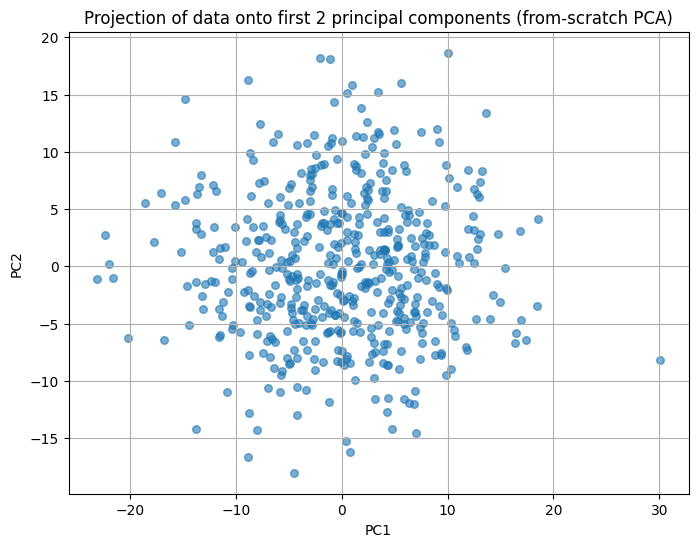

Reconstruction MSE using k_90 components: 0.9491003049233635
NumPy PCA (full) time: 0.000634 sec
scikit-learn PCA (full) time: 0.002156 sec

First 10 explained variance ratios (NumPy vs sklearn):
PC1: NumPy=0.261468, sklearn=0.261468
PC2: NumPy=0.188260, sklearn=0.188260
PC3: NumPy=0.134578, sklearn=0.134578
PC4: NumPy=0.131700, sklearn=0.131700
PC5: NumPy=0.077802, sklearn=0.077802
PC6: NumPy=0.053975, sklearn=0.053975
PC7: NumPy=0.047400, sklearn=0.047400
PC8: NumPy=0.039627, sklearn=0.039627
PC9: NumPy=0.028506, sklearn=0.028506
PC10: NumPy=0.018353, sklearn=0.018353

Total explained variance (first k_90) NumPy: 0.9348088235069086
Total explained variance (first k_90) sklearn: 0.9348088235069085

Saved results dataframe shape: (500, 18)

--- PCA from scratch summary ---
Data: 500 samples, 15 features
Number of components for >=90% variance: 8
Explained variance ratio (top 5): [0.26146802 0.18825992 0.13457794 0.13169968 0.07780151]
NumPy PCA full time: 0.000634 sec
scikit-learn PCA 

In [6]:
# PCA from scratch (NumPy only) - Project-ready notebook script
# Author: Generated with ChatGPT
# Description: Implements PCA from scratch using only NumPy, generates correlated synthetic
# financial-style data (500 samples, 15 features), analyzes explained variance,
# finds number of components for 90% variance retention, projects to 2D for visualization,
# and compares runtime & results with scikit-learn's PCA implementation.

# == Cell 1: Imports ==
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

# scikit-learn is used only for comparison (allowed by assignment recommendations).
from sklearn.decomposition import PCA as SKPCA

# Set random seed for reproducibility
np.random.seed(42)

# == Cell 2: Data generation (500 samples, 15 features) ==
# We'll generate correlated features using a random positive-semidefinite covariance matrix.
n_samples = 500
n_features = 15

# Create a random matrix and build covariance = A * A.T to ensure positive semi-definite
A = np.random.randn(n_features, n_features)
cov = A @ A.T

# Make covariance symmetric
cov = (cov + cov.T) / 2.0

# Add small diagonal jitter to ensure strict positive definiteness
cov += np.eye(n_features) * 1e-6

# Generate multivariate normal data (mean vector of zeros)
mean = np.zeros(n_features)
X = np.random.multivariate_normal(mean, cov, size=n_samples)

# Optionally convert to a pandas DataFrame for display / CSV save
cols = [f'F{i+1}' for i in range(n_features)]
df = pd.DataFrame(X, columns=cols)
print('Data shape:', df.shape)
print(df.head())

# == Cell 3: PCA from scratch (NumPy only) ==

def pca_scratch(X, n_components=None, return_all=False):
    """
    Perform PCA from scratch using NumPy.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Input data (will be centered inside function).
    n_components : int or None
        Number of principal components to retain. If None, keep all.
    return_all : bool
        If True, return a dict with intermediate results.

    Returns
    -------
    X_proj : ndarray, shape (n_samples, n_components)
        Projected data.
    explained_variance_ratio : ndarray, shape (n_components,)
        Explained variance ratio for selected components.
    components : ndarray, shape (n_components, n_features)
        Principal axes (eigenvectors) ordered by descending eigenvalue.
    extras (optional) : dict
        Contains 'mean', 'cov', 'eigenvalues', 'eigenvectors', 'cumulative_variance'
    """
    # 1. Center the data
    X = np.array(X, dtype=float)
    mean = np.mean(X, axis=0)
    X_centered = X - mean

    # 2. Compute covariance matrix (n_features x n_features)
    # Use unbiased estimator dividing by (n_samples - 1)
    n_samples = X_centered.shape[0]
    cov = (X_centered.T @ X_centered) / (n_samples - 1)

    # 3. Eigendecomposition of covariance matrix
    # Because cov is symmetric, use eigh which is stable and returns sorted ascending eigenvalues
    eigenvals, eigenvecs = np.linalg.eigh(cov)

    # 4. Sort eigenvalues & eigenvectors in descending order
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # 5. Compute explained variance ratio
    total_var = np.sum(eigenvals)
    explained_variance_ratio = eigenvals / total_var
    cumulative_variance = np.cumsum(explained_variance_ratio)

    # 6. Select top n_components
    if n_components is None:
        n_components = X.shape[1]
    components = eigenvecs[:, :n_components].T  # shape (n_components, n_features)

    # 7. Project centered data
    X_proj = X_centered @ eigenvecs[:, :n_components]

    if return_all:
        extras = {
            'mean': mean,
            'cov': cov,
            'eigenvalues': eigenvals,
            'eigenvectors': eigenvecs,
            'cumulative_variance': cumulative_variance
        }
        return X_proj, explained_variance_ratio[:n_components], components, extras

    return X_proj, explained_variance_ratio[:n_components], components

# Quick run to ensure function works
X_proj_full, evr_full, comps_full, extras = pca_scratch(X, n_components=None, return_all=True)
print('Eigenvalues (top 5):', extras['eigenvalues'][:5])
print('Explained variance ratio (top 5):', evr_full[:5])

# == Cell 4: Find number of components for 90% variance retention ==

cumvar = extras['cumulative_variance']
# Find smallest k such that cumulative variance >= 0.90
k_90 = int(np.searchsorted(cumvar, 0.90) + 1)
print(f'Number of components to retain >=90% variance: {k_90}')

# Project to k_90 components
X_proj_k90, evr_k90, comps_k90 = pca_scratch(X, n_components=k_90)
print('Explained variance ratio sum (k_90):', np.sum(evr_k90))

# == Cell 5: 2D projection for visualization (top 2 components) ==
X_proj_2, evr_2, comps_2 = pca_scratch(X, n_components=2)

plt.figure(figsize=(8,6))
plt.scatter(X_proj_2[:,0], X_proj_2[:,1], alpha=0.6, s=30)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of data onto first 2 principal components (from-scratch PCA)')
plt.grid(True)
plt.show()

# == Cell 6: Reconstruction and reconstruction error (optional) ==

def reconstruct_from_pcs(X_proj, components, mean):
    # components: shape (n_components, n_features)
    return X_proj @ components + mean

mean_vec = extras['mean']
reconstructed = reconstruct_from_pcs(X_proj_k90, comps_k90, mean_vec)
reconstruction_mse = np.mean((X - reconstructed)**2)
print('Reconstruction MSE using k_90 components:', reconstruction_mse)

# == Cell 7: Compare with scikit-learn PCA (runtime + explained variance) ==

# Time NumPy implementation
start = time.perf_counter()
X_proj_np_full, evr_np_full, comps_np_full, extras_np = pca_scratch(X, n_components=None, return_all=True)
end = time.perf_counter()
ntime_full = end - start

# Time scikit-learn PCA (fit) - keep all components
start = time.perf_counter()
skpca = SKPCA(n_components=None, svd_solver='full', random_state=42)
skpca.fit(X)
end = time.perf_counter()
sk_time_full = end - start

print(f'NumPy PCA (full) time: {ntime_full:.6f} sec')
print(f'scikit-learn PCA (full) time: {sk_time_full:.6f} sec')

# Compare explained variance ratios (first 10)
sk_evr = skpca.explained_variance_ratio_
np_evr = extras_np['eigenvalues'] / np.sum(extras_np['eigenvalues'])

print('\nFirst 10 explained variance ratios (NumPy vs sklearn):')
for i in range(min(10, n_features)):
    print(f'PC{i+1}: NumPy={np_evr[i]:.6f}, sklearn={sk_evr[i]:.6f}')

# Verify that projections up to sign/rotation are similar: compare explained variance sums
print('\nTotal explained variance (first k_90) NumPy:', np.sum(np_evr[:k_90]))
print('Total explained variance (first k_90) sklearn:', np.sum(sk_evr[:k_90]))

# == Cell 8: Save results to CSV (optional) ==

results_df = df.copy()
# Add principal component columns (first 2 for compactness)
results_df['PC1'] = X_proj_2[:,0]
results_df['PC2'] = X_proj_2[:,1]
results_df['Cluster_kmeans_placeholder'] = np.nan  # placeholder if you want to add clustering later

# Save to CSV (uncomment if needed)
# results_df.to_csv('pca_results.csv', index=False)

print('\nSaved results dataframe shape:', results_df.shape)

# == Cell 9: Summary printout for report ==
print('\n--- PCA from scratch summary ---')
print('Data: {} samples, {} features'.format(n_samples, n_features))
print('Number of components for >=90% variance:', k_90)
print('Explained variance ratio (top 5):', evr_full[:5])
print('NumPy PCA full time: {:.6f} sec'.format(ntime_full))
print('scikit-learn PCA full time: {:.6f} sec'.format(sk_time_full))

# End of notebook script
